## Download Dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-09 07:32:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.233.21, 2600:1409:9800:690::317f, 2600:1409:9800:694::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.117.233.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   250MB/s    in 3.1s    

2022-08-09 07:32:38 (250 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Import Modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import os
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings("ignore")

## Create Dtaframe for Input and Output

In [4]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):

        if class_name == "Cat":
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0],label[0])

PetImages/Cat/5508.jpg 0


In [5]:
len(label)

25002

In [6]:
df = pd.DataFrame()
df["images"] = input_path
df["label"] = label
df = df.sample(frac= 1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/2864.jpg      0
1  PetImages/Cat/11318.jpg      0
2   PetImages/Dog/6030.jpg      1
3   PetImages/Cat/3899.jpg      0
4   PetImages/Cat/8839.jpg      0

## EDA

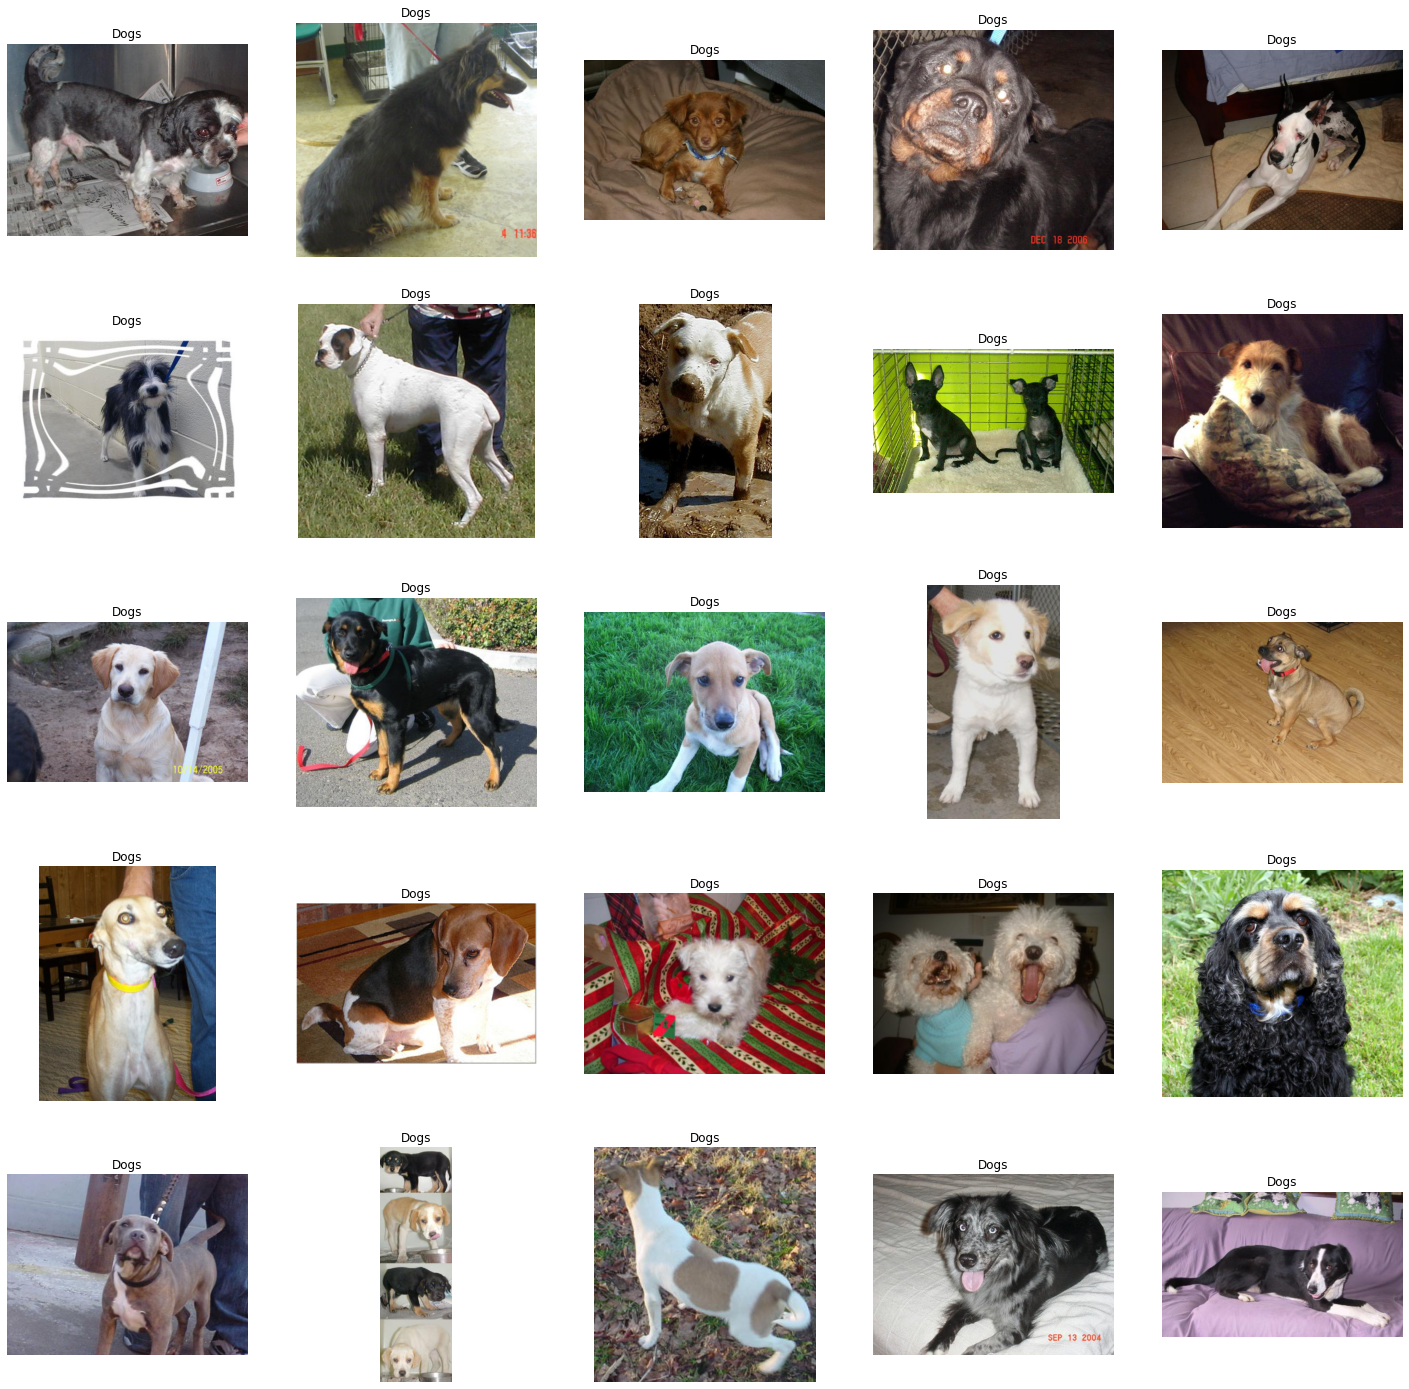

In [10]:
plt.figure(figsize=(25,25))
temp = df[df["label"]==1]["images"]
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Dogs")
    plt.axis("off")

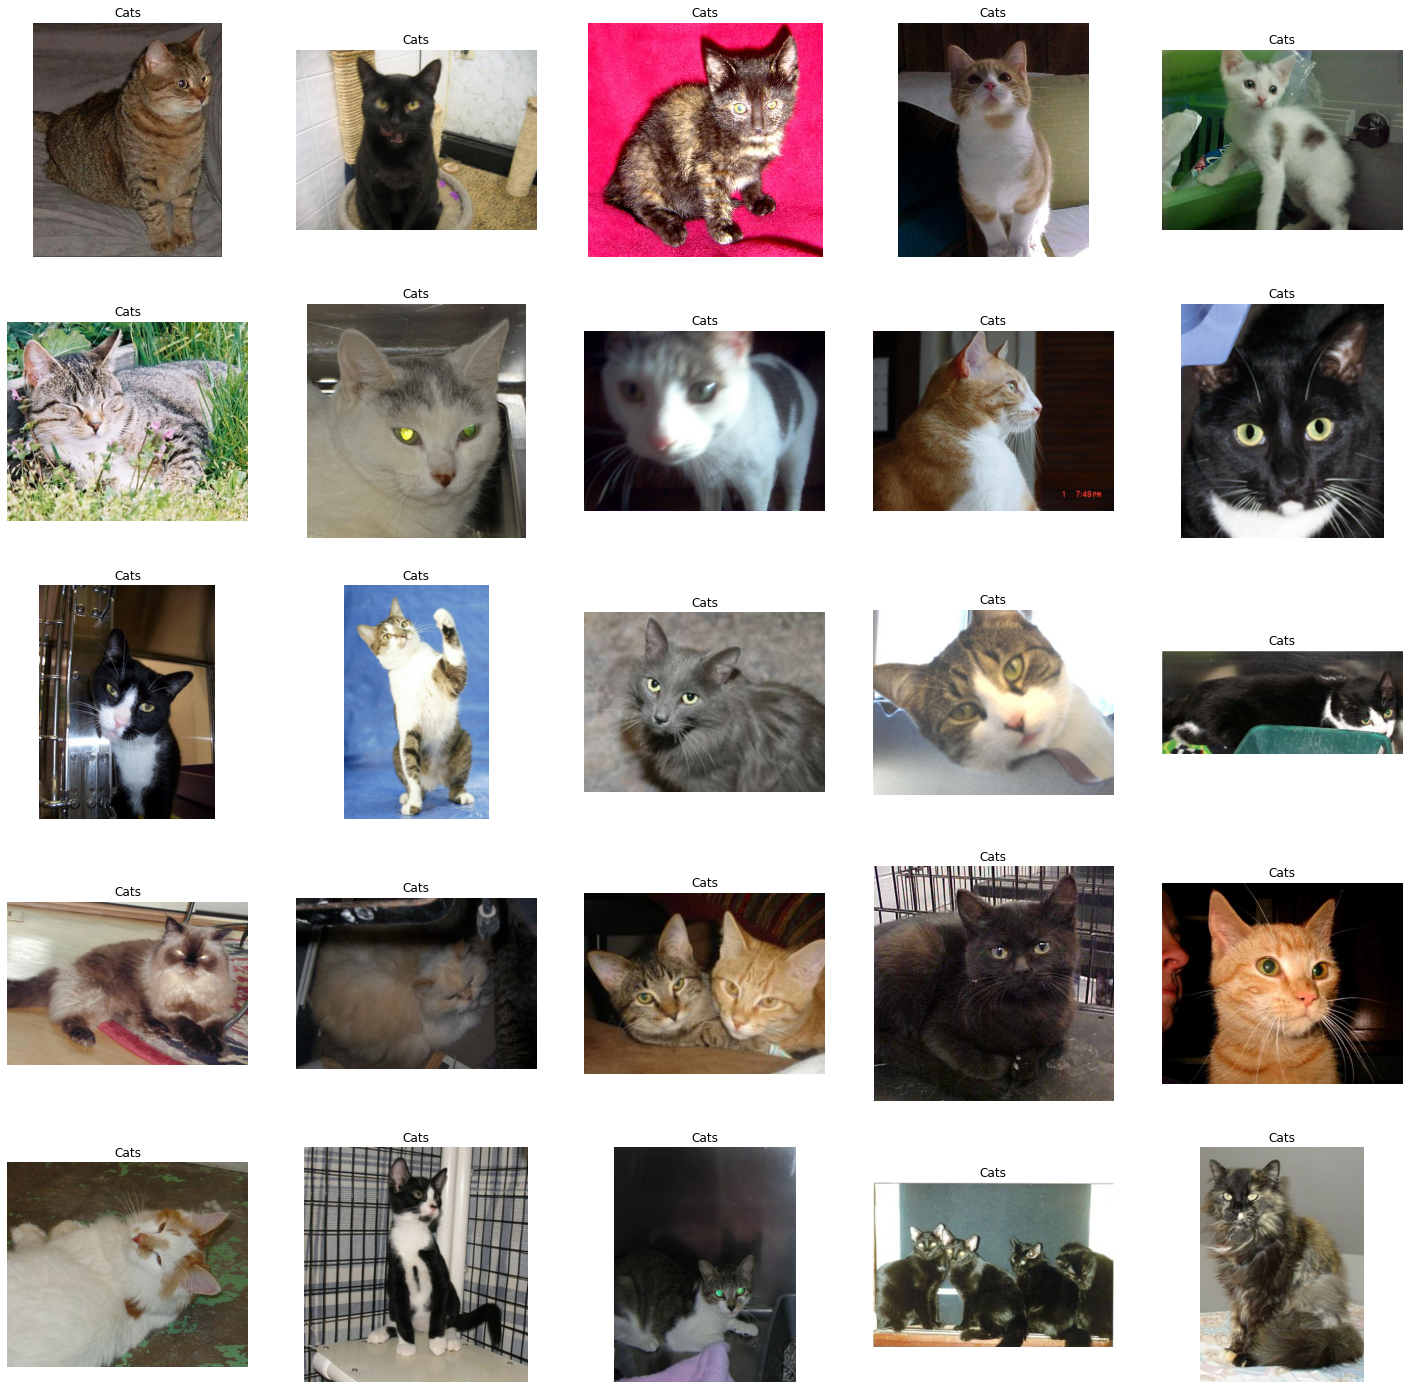

In [11]:
plt.figure(figsize=(25,25))
temp = df[df["label"]==0]["images"]
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Cats")
    plt.axis("off")

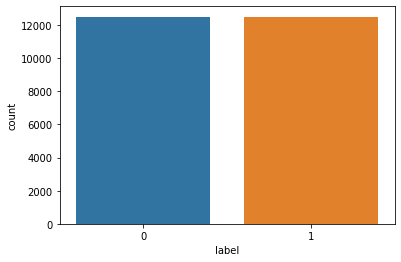

In [12]:
import seaborn as sns
sns.countplot(df["label"])

## Create DataGenerator 

In [15]:
df["label"] = df["label"].astype("str")

In [17]:
df.head()

images label
0   PetImages/Cat/2864.jpg     0
1  PetImages/Cat/11318.jpg     0
2   PetImages/Dog/6030.jpg     1
3   PetImages/Cat/3899.jpg     0
4   PetImages/Cat/8839.jpg     0

In [31]:
#delete db files
for i in df["images"]:
  if ".jpg" not in i:
    print(i)



PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [32]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [33]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
train.head(), test.head()

(                       images label
 23289  PetImages/Dog/2663.jpg     1
 17783  PetImages/Cat/2815.jpg     0
 1020   PetImages/Dog/9589.jpg     1
 12645  PetImages/Dog/5204.jpg     1
 1533   PetImages/Dog/8597.jpg     1,                         images label
 6868    PetImages/Dog/6142.jpg     1
 22912  PetImages/Dog/12380.jpg     1
 9669    PetImages/Cat/7065.jpg     0
 13639   PetImages/Dog/5812.jpg     1
 23340   PetImages/Cat/8006.jpg     0)

In [36]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range= 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    df, 
    x_col="images", 
    y_col= 'label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode="binary"
    )

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 24998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [37]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation = "relu", input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(1, activation = "sigmoid")

])
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)      

In [38]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
391/391 [==============================] - 160s 409ms/step - loss: 0.6417 - accuracy: 0.6312 - val_loss: 0.5523 - val_accuracy: 0.7198
Epoch 2/10
391/391 [==============================] - 162s 415ms/step - loss: 0.5405 - accuracy: 0.7245 - val_loss: 0.4905 - val_accuracy: 0.7698
Epoch 3/10
391/391 [==============================] - 155s 397ms/step - loss: 0.4936 - accuracy: 0.7628 - val_loss: 0.4806 - val_accuracy: 0.7640
Epoch 4/10
391/391 [==============================] - 154s 394ms/step - loss: 0.4720 - accuracy: 0.7759 - val_loss: 0.4601 - val_accuracy: 0.7842
Epoch 5/10
391/391 [==============================] - 154s 393ms/step - loss: 0.4538 - accuracy: 0.7874 - val_loss: 0.4202 - val_accuracy: 0.8104
Epoch 6/10
391/391 [==============================] - 154s 394ms/step - loss: 0.4322 - accuracy: 0.7981 - val_loss: 0.3977 - val_accuracy: 0.8144
Epoch 7/10
391/391 [==============================] - 155s 396ms/step - loss: 0.4163 - accuracy: 0.8089 - val_loss: 0.3904 -

## Visualization 

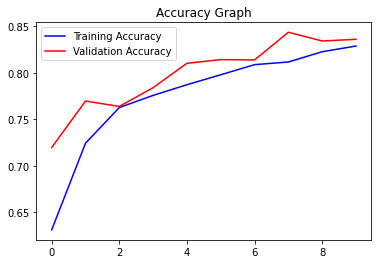

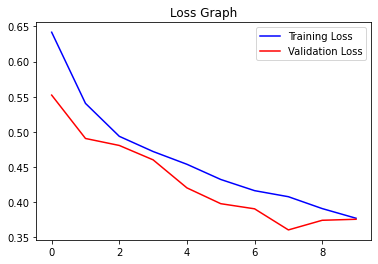

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()